# Exploratory Data Analysis

Analyzing in the data lifecycle confirms that the data can answer the questions that are proposed or solving a particular problem. This step can also focus on confirming a model is correctly addressing these questions and problems. This lesson is focused on Exploratory Data Analysis or EDA, which are techniques for defining features and relationships within the data and can be used to prepare the data for modeling.

We'll be using an example dataset from [Kaggle](https://www.kaggle.com/balaka18/email-spam-classification-dataset-csv/version/1) to show how this can be applied with Python and the [Pandas](../pandas/intro_to_pandas) library. This dataset contains a count of some common words found in emails, the sources of these emails are anonymous.

```{figure} ../images/ds/eda.png
---
name: eda
---
Exploratory Data Analysis
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load the dataset

In [2]:
email_df = pd.read_csv("../../data/emails.csv")

## Data Profiling and Descriptive Statistics

How do we evaluate if we have enough data to solve this problem? Data profiling can summarize and gather some general overall information about our dataset through techniques of descriptive statistics. Data profiling helps us understand what is available to us, and descriptive statistics helps us understand how many things are available to us.

We can use Pandas's [`describe()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) for this. It provides the count, max and min values, mean, standard deviation and quantiles on the numerical data. Using descriptive statistics like the `describe()` function can help you assess how much you have and if you need more.

In [3]:
email_df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


## Sampling and Querying

Exploring everything in a large dataset can be very time consuming and a task that’s usually left up to a computer to do. However, sampling is a helpful tool in understanding of the data and allows us to have a better understanding of what’s in the dataset and what it represents. With a sample, you can apply probability and statistics to come to some general conclusions about your data. While there’s no defined rule on how much data you should sample it’s important to note that the more data you sample, the more precise of a generalization you can make of about data. Pandas has the [`sample()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) in its library where you can pass an argument of how many random samples you’d like to receive and use.

General querying of the data can help you answer some general questions and theories you may have. In contrast to sampling, queries allow you to have control and focus on specific parts of the data you have questions about. The [`query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) in the Pandas library allows you to select columns and receive simple answers about the data through the rows retrieved.

In [4]:
# Sampling 10 emails
email_df.sample(10)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
323,Email 324,4,6,1,1,3,2,56,3,0,...,0,0,0,0,0,0,0,1,0,1
1615,Email 1616,6,1,1,2,1,1,26,1,0,...,0,0,0,0,0,0,0,0,0,0
315,Email 316,6,5,2,3,1,1,34,8,0,...,0,0,0,0,0,0,0,0,0,0
250,Email 251,22,10,1,3,4,4,85,1,1,...,0,0,0,0,0,0,0,0,0,0
3414,Email 3415,2,2,3,0,3,1,31,2,2,...,0,0,0,0,0,0,0,0,0,0
4725,Email 4726,10,12,4,4,4,1,87,2,0,...,0,0,0,0,0,0,0,0,0,0
2999,Email 3000,0,0,1,0,1,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
4131,Email 4132,3,4,2,1,1,1,13,3,0,...,0,0,0,0,0,0,0,1,0,1
2353,Email 2354,0,0,1,1,0,0,9,0,0,...,0,0,0,0,0,0,0,0,0,1
1359,Email 1360,1,1,1,0,1,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Returns rows where there are more occurrences of "to" than "the"
email_df.query("the < to")

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,0,1
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,0,1,0,1
13,Email 14,4,5,7,1,5,1,37,1,3,...,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5156,Email 5157,4,13,1,0,3,1,48,2,0,...,0,0,0,0,0,0,0,1,0,1
5159,Email 5160,2,13,1,0,2,1,38,2,0,...,0,0,0,0,0,0,0,1,0,1
5162,Email 5163,2,3,1,2,1,2,32,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


## Exploring to identify inconsistencies

All the topics in this lesson can help identify missing or inconsistent values, but Pandas provides functions to check for some of these. [`isna()` or `isnull()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isna.html) can check for missing values. One important piece of exploring for these values within your data is to explore why they ended up that way in the first place.

In [6]:
email_df.isna()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5168,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5169,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5170,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
email_df.isna().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [8]:
email_df.isnull()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5168,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5169,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5170,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
email_df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

## More exploration and analysis

In [10]:
# Count the number of spam and non-spam emails
spam_count = email_df[email_df["Prediction"] == 1].shape[0]
non_spam_count = email_df[email_df["Prediction"] == 0].shape[0]
total_emails = email_df.shape[0]

# Print the count of spam and non-spam emails
print("Number of spam emails:", spam_count)
print("Number of non-spam emails:", non_spam_count)
print("Total number of emails:", total_emails)

Number of spam emails: 1500
Number of non-spam emails: 3672
Total number of emails: 5172


In [11]:
# Percentage of spam and non-spam emails
spam_percentage = (spam_count / total_emails) * 100
non_spam_percentage = (non_spam_count / total_emails) * 100

# Print the percentage of spam and non-spam emails
print("Percentage of spam emails: {:.2f}%".format(spam_percentage))
print("Percentage of non-spam emails: {:.2f}%".format(non_spam_percentage))

Percentage of spam emails: 29.00%
Percentage of non-spam emails: 71.00%


In [12]:
# Sum up all column values for each row
numeric_columns = email_df.select_dtypes(include=np.number)

email_df["total_words"] = numeric_columns.sum(axis=1)
email_df[["total_words"]].head()

,total_words
0,53
1,2203
2,113
3,1019
4,1075


## Exploring with Visualizations

You don’t have to wait until the data is thoroughly cleaned and analyzed to start creating visualizations. In fact, having a visual representation while exploring can help identify patterns, relationships, and problems in the data. Furthermore, visualizations provide a means of communication with those who are not involved with managing the data and can be an opportunity to share and clarify additional questions that were not addressed in the capture stage. Refer to the [section on Visualizations](../data_visualization/intro_to_matplotlib) to learn more about some popular ways to explore visually.

In [13]:
predictions = email_df["Prediction"].value_counts()
predictions

Prediction
0    3672
1    1500
Name: count, dtype: int64

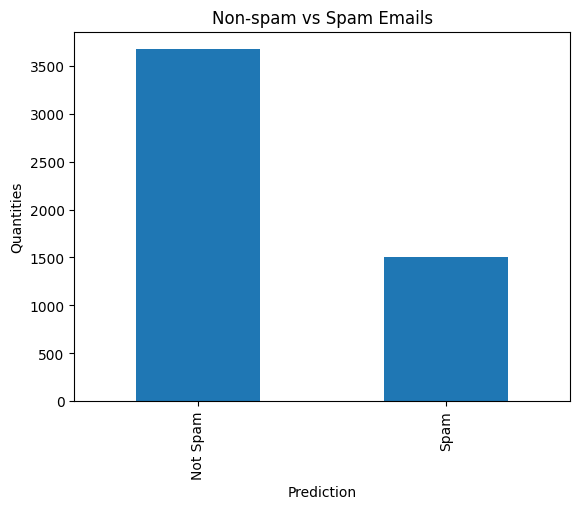

In [14]:
predictions.plot(kind="bar")

plt.xticks([0, 1], ["Not Spam", "Spam"])
plt.ylabel("Quantities")
plt.title("Non-spam vs Spam Emails")
plt.show()

In [15]:
spam_emails = email_df.query("Prediction == 1")
spam_emails

,Email No.,the,to,ect,and,for,of,a,you,hou,...,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction,total_words
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,1,1307
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,1,0,1,565
16,Email 17,3,1,2,2,0,1,17,0,0,...,0,0,0,0,0,0,1,0,1,219
17,Email 18,36,21,6,14,7,17,194,25,5,...,0,0,0,0,0,0,3,0,1,4323
25,Email 26,12,53,2,14,18,14,287,0,2,...,0,0,0,0,0,0,6,0,1,4927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5162,Email 5163,2,3,1,2,1,2,32,0,0,...,0,0,0,0,0,0,0,0,1,667
5163,Email 5164,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,64
5166,Email 5167,1,0,1,1,0,0,4,0,0,...,0,0,0,0,0,0,0,0,1,102
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,1,179


In [16]:
spam_emails.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction,total_words
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,1,1307
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,1,0,1,565
16,Email 17,3,1,2,2,0,1,17,0,0,...,0,0,0,0,0,0,1,0,1,219
17,Email 18,36,21,6,14,7,17,194,25,5,...,0,0,0,0,0,0,3,0,1,4323
25,Email 26,12,53,2,14,18,14,287,0,2,...,0,0,0,0,0,0,6,0,1,4927


In [17]:
long_word_columns = [word for word in spam_emails.columns[1:-2] if len(word) > 3]
word_totals = spam_emails[long_word_columns].sum().sort_values(ascending=False)
word_totals

this          2303
your          2096
with          2006
that          1361
here          1295
              ... 
intrastate       0
hakemack         0
heather          0
gomes            0
payback          0
Length: 2574, dtype: int64

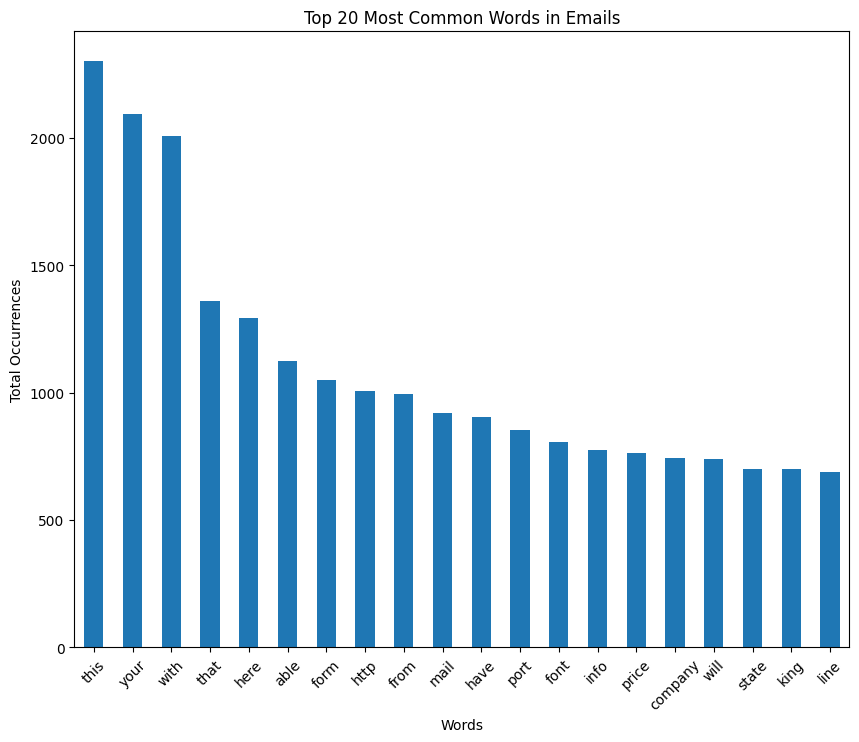

In [18]:
# Plot the top 20 most common words
plt.figure(figsize=(10, 8))
word_totals.head(20).plot(kind="bar")
plt.title("Top 20 Most Common Words in Emails")
plt.xlabel("Words")
plt.ylabel("Total Occurrences")
plt.xticks(rotation=45)
plt.show()